## Preprocessing for Neural Network Model

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt




## Use scaled data 


## Selected features recommended by random forest regressor 
 

In [2]:

# Use the preprocessed data files
hp_scaled_data_path = '../3_Preprocessed_Scaled_Data/scaled_preprocessed_hp_data.csv'

# Read the House Prices scaled data 
hp_scaled_df = pd.read_csv(hp_scaled_data_path)

In [3]:
#Display the House Prices scaled DataFrame
hp_scaled_df.head()

,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.207142,1.050994,0.878668,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,1.107810,...,0,0,0,0,1,0,0,0,1,0
1,-0.091886,0.156734,-0.429577,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.819964,...,0,0,0,0,1,0,0,0,1,0
2,0.073480,0.984752,0.830215,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,1.107810,...,0,0,0,0,1,0,0,0,1,0
3,-0.096897,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,1.107810,...,0,0,0,0,1,0,0,0,0,0
4,0.375148,0.951632,0.733308,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,1.107810,...,0,0,0,0,1,0,0,0,1,0


## Split to Prepare the data 

In [4]:

# Split our preprocessed data into our features and target arrays
# As 'SalePrice' is your target variable
X = hp_scaled_df.drop('SalePrice', axis=1)
y = hp_scaled_df['SalePrice']

 
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Consider selected features for Modeling


In [5]:
# List of columns to keep
columns_to_keep = ['GarageCars', 'ExterQual_TA', '2ndFlrSF', '1stFlrSF', 'YearBuilt',
                   'FullBath', 'TotalBsmtSF', 'BsmtFinSF1', 'OverallQual_Other',
                   'LotArea', 'GarageArea', 'YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces']
# Drop columns not in the columns_to_keep list from X_train and X_test
X_train_filtered = X_train[columns_to_keep]
X_test_filtered = X_test[columns_to_keep]

In [6]:
X_train_filtered

,GarageCars,ExterQual_TA,2ndFlrSF,1stFlrSF,YearBuilt,FullBath,TotalBsmtSF,BsmtFinSF1,OverallQual_Other,LotArea,GarageArea,YearRemodAdd,TotRmsAbvGrd,Fireplaces
254,-1.026858,1,-0.795163,0.391697,-0.472560,-1.026041,0.585036,1.049169,0,-0.212153,-0.837406,-1.350194,-0.934130,-0.951226
1066,0.311725,0,0.973941,-0.940928,0.719786,0.789741,-0.589275,-0.973018,0,-0.268578,-0.435032,0.442586,0.296763,0.600495
638,-2.365440,1,-0.795163,-0.948691,-2.029235,-1.026041,-0.596115,-0.973018,0,-0.174369,-2.212963,-1.689368,-1.549576,-0.951226
799,-1.026858,1,1.008315,-0.469981,-1.134975,-1.026041,-0.744329,0.274948,0,-0.332419,-1.090059,-1.689368,0.296763,2.152216
380,-1.026858,1,0.728742,-0.353538,-1.565545,0.789741,-0.071666,-0.494887,0,-0.552908,-0.771903,-1.689368,-0.318683,0.600495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.311725,0,-0.795163,0.391697,1.150356,0.789741,0.585036,-0.920380,0,-0.120249,-0.154306,1.024029,-0.318683,0.600495
1130,0.311725,1,0.701243,0.427923,-1.433062,0.789741,0.147235,0.391191,1,-0.271885,0.482006,-1.689368,0.296763,2.152216
1294,0.311725,1,-0.795163,-0.772733,-0.538802,-1.026041,-0.441061,-0.606743,0,-0.235003,0.463291,0.248772,-0.934130,-0.951226
860,-1.026858,0,0.382712,-0.648527,-1.764269,-1.026041,-0.331610,-0.973018,0,-0.288121,-1.202350,0.636400,0.296763,0.600495


## Create  the  NN Model

## Compile, Train and Evaluate the Model

In [7]:
# Determine the number of input features
input_features =   X_train_filtered.shape[1]            #len( X_train_filtered[0])   #X_train_filtered.shape[1] 

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# Input layer
nn.add(tf.keras.layers.Dense(units=80, input_dim=input_features, activation='relu'))

# Fist hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='linear'))

# Check the structure of the model
nn.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                1200      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3661 (14.30 KB)
Trainable params: 3661 (14.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Use Adam optimizer and mean squared error for loss
# Also include root mean squared error and mean absolute error as metrics

nn.compile(optimizer='adam', 
           loss='mean_squared_error', 
           metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mae'])

In [25]:
# Train the model
fit_model = nn.fit(X_train_filtered, y_train, epochs=50)

Epoch 1/50
37/37 [==============================] - 2s 6ms/step - loss: 8746437632.0000 - root_mean_squared_error: 93522.3906 - mae: 82437.4531
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 8347245056.0000 - root_mean_squared_error: 91363.2578 - mae: 79793.9297
Epoch 3/50
37/37 [==============================] - 0s 7ms/step - loss: 7987278848.0000 - root_mean_squared_error: 89371.5781 - mae: 77317.1719
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 7660854784.0000 - root_mean_squared_error: 87526.3125 - mae: 74968.1250
Epoch 5/50
37/37 [==============================] - 0s 6ms/step - loss: 7363182592.0000 - root_mean_squared_error: 85808.9922 - mae: 72808.9688
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 7096107520.0000 - root_mean_squared_error: 84238.3984 - mae: 70770.7500
Epoch 7/50
37/37 [==============================] - 0s 5ms/step - loss: 6856176640.0000 - root_mean_squared_error: 82802.0312 - mae: 690

In [26]:
# Evaluate the model using the test data
model_loss, root_mean_squared_error, mean_absoluter_error = nn.evaluate(X_test_filtered,y_test,verbose=2)
print(f"Loss: {model_loss}, root_mean_squared_error: {root_mean_squared_error} mean_absoluter_error :{mean_absoluter_error}")

10/10 - 0s - loss: 3098867200.0000 - root_mean_squared_error: 55667.4688 - mae: 44180.4297 - 323ms/epoch - 32ms/step
Loss: 3098867200.0, root_mean_squared_error: 55667.46875 mean_absoluter_error :44180.4296875


In [27]:
nn.evaluate(X_test_filtered ,y_test,verbose=2)

10/10 - 0s - loss: 3098867200.0000 - root_mean_squared_error: 55667.4688 - mae: 44180.4297 - 77ms/epoch - 8ms/step


[3098867200.0, 55667.46875, 44180.4296875]

## Evaluate Predictions

In [28]:
# Make predictions on the test data
y_predict = nn.predict(X_test_filtered)
y_predict_list = [i[0] for i in y_predict.tolist()]

#y_test = hp_train_df['SalePrice'] #.values.reshape(-1, 1)
#y_test.reshape(-1, 1)

# Create a DataFrame to compare actual and predicted values
pred = pd.DataFrame({"Actual": y_test, "Predicted": y_predict_list, "Delta": abs(y_test - y_predict_list)})


10/10 [==============================] - 0s 3ms/step


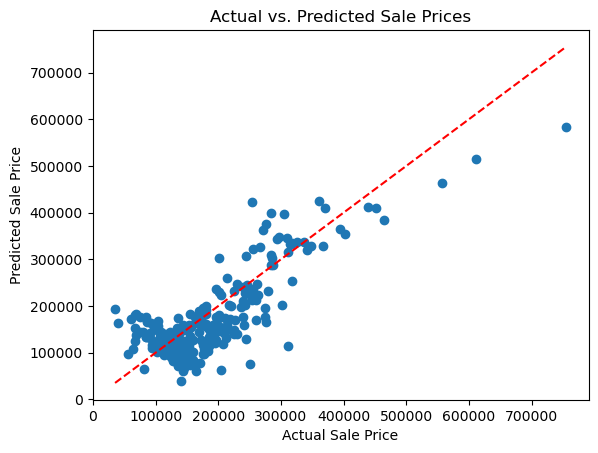

In [29]:
# Create scatter plot
plt.scatter(pred['Actual'], pred['Predicted'])

# Plot diagonal dashed red line for perfect predictions
plt.plot([pred['Actual'].min(), pred['Actual'].max()],
         [pred['Actual'].min(), pred['Actual'].max()], '--r')

# Add labels and title
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Prices')

# Display the plot
plt.show()

In [30]:
# Evaluate the performance of your predictive model.
pred.head(10)

,Actual,Predicted,Delta
892,154500,81613.929688,72886.070312
1105,325000,337695.781250,12695.781250
413,115000,108454.718750,6545.281250
522,159000,127580.953125,31419.046875
1036,315500,332617.531250,17117.531250
614,75500,175450.296875,99950.296875
218,311500,114304.421875,197195.578125
1160,146000,149290.218750,3290.218750
649,84500,177189.375000,92689.375000
887,135500,106842.195312,28657.804688


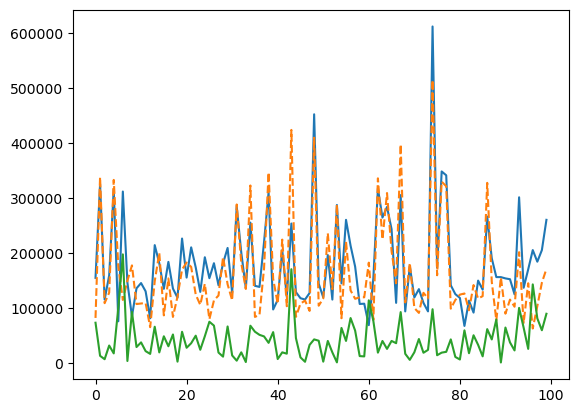

In [31]:
# Reset the index of the DataFrame and select the first 100 rows
pred1 = pred.reset_index().head(100)

# Plot the Actual values
plt.plot(pred1.index, pred1.Actual, label='Actual')

# Plot the Predicted values with a dashed line style
plt.plot(pred1.index, pred1.Predicted, label='Predicted', linestyle='--')

# Plot the Delta values (absolute difference between Actual and Predicted)
plt.plot(pred1.index, pred1.Delta, label='Delta')


## Save the Model

In [32]:
# # Export our model to HDF5 file
# file_path = "House_Price_Predictions.h5"

# # Save the model to an HDF5 file
# nn.save(file_path)

# # Print a success message
# print(f"Model successfully saved to {file_path}")
